In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl
from math import *
from functions_old.multi_gradient_descent import feature_scaling

In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    for i in range(x.shape[0]):
        k += -log(sigmoid(np.dot(w,x[i]) + b))*y[i] - log(1-sigmoid(np.dot(w,x[i])+b))*(1-y[i])
    return k/x.shape[1]

def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for regression
    for j in range(x.shape[1]):
        dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    hist = []
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        k = cost(x,y,w,b)
        hist.append([i,k])
        if i%100 ==0:
            print(w,b,"-------------------------------- cost: ",k)
            pass
    return w,b,hist




In [47]:
file = "../data from book/BrainCancer.csv"
data = pd.read_csv(file)
data.head()


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,1,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,2,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,3,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,4,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,5,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [48]:
ls = []
leadger = []
def categorical_data(x):
    if x not in ls:
        ls.append(x)
    return ls.index(x)

data['diagnosis'] = data['diagnosis'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['loc'] = data['loc'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['stereo'] = data['stereo'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['sex'] = data['sex'].apply(categorical_data)
leadger.append(ls)
ls =[]
print(leadger)
# data
x_data = (np.array(data[['diagnosis','loc','stereo','sex','ki','gtv']]))
y_data = (np.array(data['status']))
X = feature_scaling(x_data)

[['Meningioma', 'HG glioma', 'LG glioma', nan, 'Other'], ['Infratentorial', 'Supratentorial'], ['SRS', 'SRT'], ['Female', 'Male']]


C:\Users\DINO\AppData\Local\Temp\ipykernel_10388\58001190.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


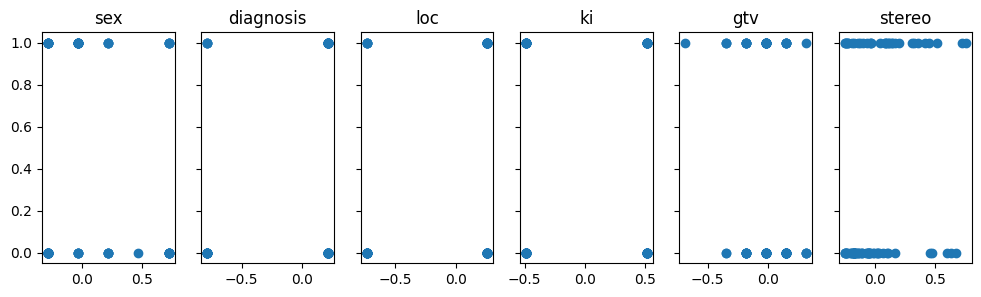

In [49]:
x_features = ['sex'	,'diagnosis','loc',	'ki',"gtv",	"stereo"]
fig,ax=pl.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_title(x_features[i])
fig.show()
    

In [50]:
per_w ,per_b,hist = logistic_descent(X,y_data,0.01,10000)

[ 1.81592200e-06  4.59299869e-06  5.35605278e-06  3.74189989e-06
 -2.49215424e-06  3.23864080e-06] -0.0010227272727272728 -------------------------------- cost:  10.164615661497473
[ 0.00018336  0.00046371  0.00054069  0.00037773 -0.00025168  0.00032701] -0.09139059019208375 -------------------------------- cost:  10.043288555060224
[ 0.00036482  0.00092246  0.00107551  0.00075132 -0.00050079  0.0006506 ] -0.16178568318700456 -------------------------------- cost:  9.96924446736782
[ 0.00054619  0.00138085  0.0016098   0.00112451 -0.00074985  0.000974  ] -0.21668088463091992 -------------------------------- cost:  9.923798120325548
[ 0.00072747  0.00183888  0.00214357  0.00149731 -0.00099884  0.00129722] -0.25954334173664567 -------------------------------- cost:  9.895673809191777
[ 0.00090866  0.00229655  0.00267684  0.00186973 -0.00124778  0.00162026] -0.29305243196314135 -------------------------------- cost:  9.878068784293072
[ 0.00108976  0.00275388  0.0032096   0.00224176 -0.00

In [56]:
hist[:]

[[0, 10.164615661497473],
 [1, 10.163080326236692],
 [2, 10.161552604216615],
 [3, 10.160032457410631],
 [4, 10.15851984797825],
 [5, 10.157014738264253],
 [6, 10.155517090797847],
 [7, 10.154026868291849],
 [8, 10.152544033641826],
 [9, 10.15106854992529],
 [10, 10.149600380400832],
 [11, 10.148139488507336],
 [12, 10.14668583786314],
 [13, 10.145239392265198],
 [14, 10.143800115688297],
 [15, 10.142367972284225],
 [16, 10.140942926380946],
 [17, 10.139524942481811],
 [18, 10.138113985264757],
 [19, 10.136710019581482],
 [20, 10.135313010456683],
 [21, 10.133922923087187],
 [22, 10.132539722841262],
 [23, 10.13116337525773],
 [24, 10.129793846045231],
 [25, 10.128431101081427],
 [26, 10.127075106412212],
 [27, 10.125725828250944],
 [28, 10.124383232977653],
 [29, 10.123047287138297],
 [30, 10.121717957443959],
 [31, 10.120395210770083],
 [32, 10.119079014155746],
 [33, 10.117769334802844],
 [34, 10.11646614007537],
 [35, 10.115169397498645],
 [36, 10.113879074758566],
 [37, 10.1125951

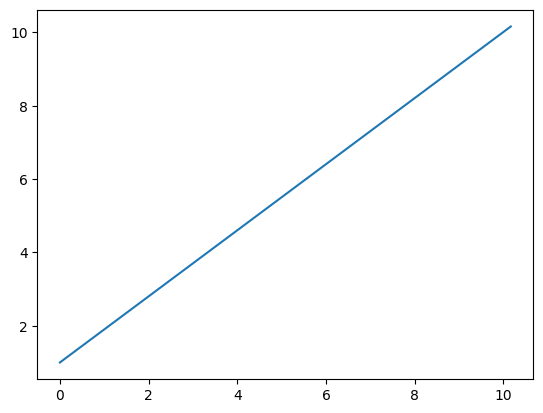

In [52]:
pl.plot(hist[:][0],hist[:][1])
pl.show()